In [118]:
from pydataset import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
import scipy.stats as st
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR
import pprint

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [119]:
df = data('mtcars')

In [120]:
df.sample(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


In [121]:
random_categories = np.random.choice(['CategoryA', 'CategoryB', 'CategoryC'], size=len(df))
random_color = np.random.choice(['rojo', 'azul'], size=len(df))

# Add the array as a new column to the DataFrame
df['Random_Category'] = random_categories
df['Random_color'] = random_color

# Exploratory data analysis

In [122]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mpg              32 non-null     float64
 1   cyl              32 non-null     int64  
 2   disp             32 non-null     float64
 3   hp               32 non-null     int64  
 4   drat             32 non-null     float64
 5   wt               32 non-null     float64
 6   qsec             32 non-null     float64
 7   vs               32 non-null     int64  
 8   am               32 non-null     int64  
 9   gear             32 non-null     int64  
 10  carb             32 non-null     int64  
 11  Random_Category  32 non-null     object 
 12  Random_color     32 non-null     object 
dtypes: float64(5), int64(6), object(2)
memory usage: 3.5+ KB


In [124]:
#Function that takes df, and returns: cols and rows,duplicated rows, missing values
def intro_df(df):
    print('Number of rows and columns:', df.shape)
    print('Number of duplicated rows:', df.duplicated().sum())
    print('Number of missing values:', df.isnull().sum().sum())
    
    print("-----------------------------------")
    
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    print('Numeric columns:', list(numeric_columns))
    categorical_columns = df.select_dtypes(include=[object]).columns
    print('Categorical columns:', list(categorical_columns))
    
    print("-----------------------------------")
    
    if df.isnull().sum().sum() > 0:
        print('Columns with missing values:', df.isnull().sum())
    if df.duplicated().sum() > 0:
        print('Duplicated rows:', df[df.duplicated()])
        
    print("-----------------------------------")
        
    return numeric_columns, categorical_columns

In [125]:
intro_df(df)

Number of rows and columns: (32, 13)
Number of duplicated rows: 0
Number of missing values: 0
-----------------------------------
Numeric columns: ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
Categorical columns: ['Random_Category', 'Random_color']
-----------------------------------
-----------------------------------


(Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object'), Index(['Random_Category', 'Random_color'], dtype='object'))

## Outliers

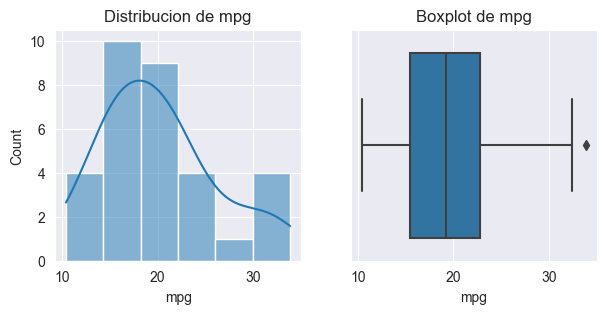

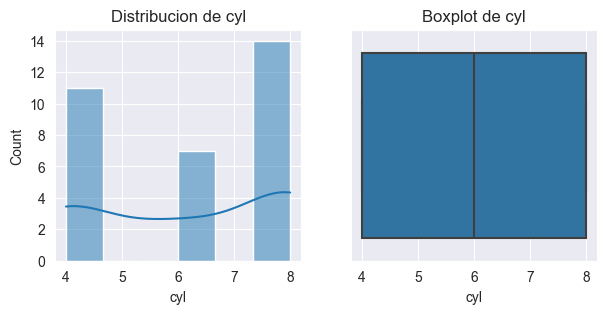

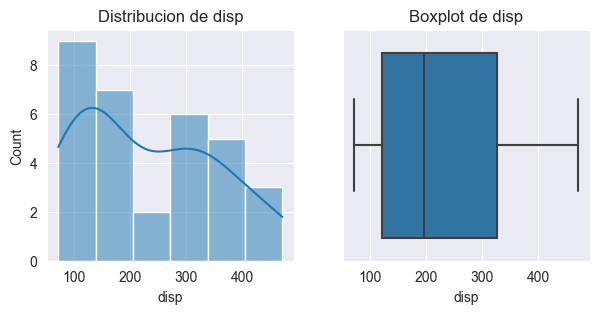

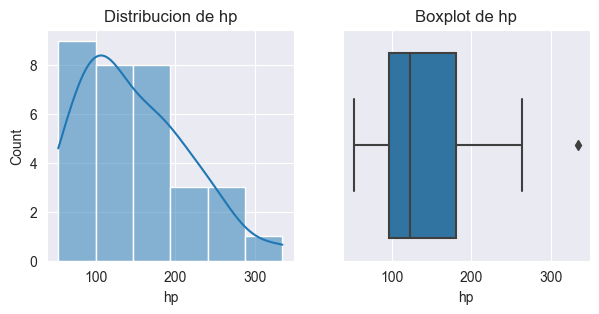

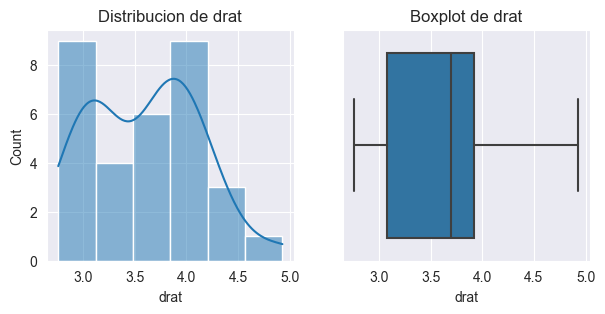

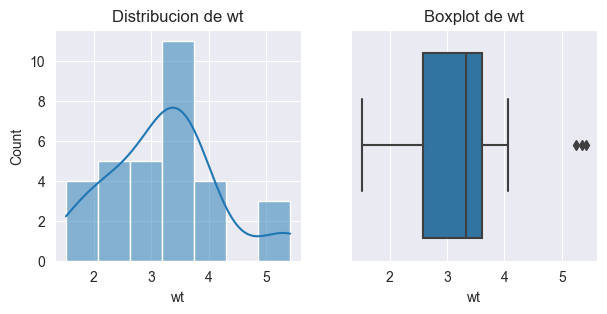

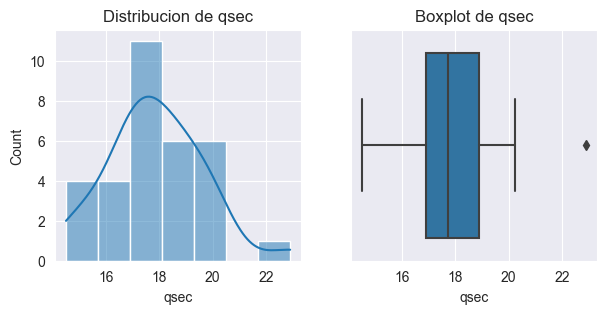

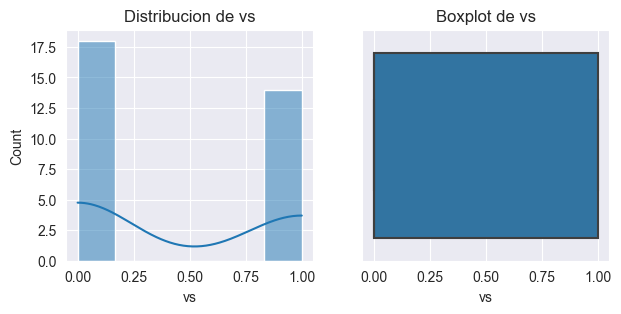

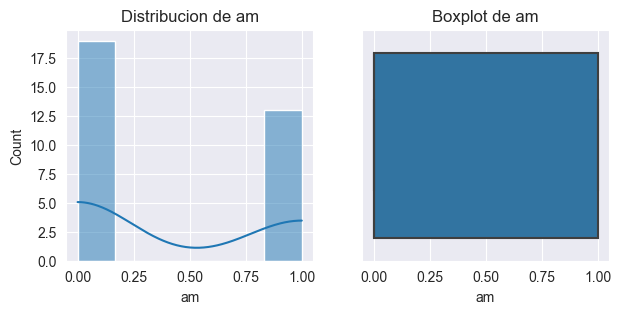

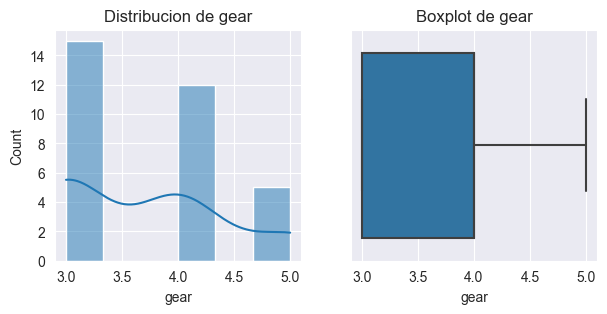

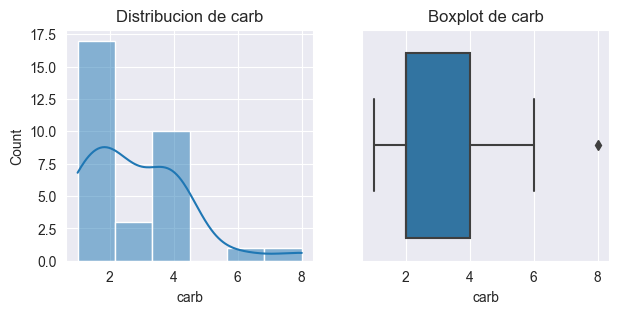

In [126]:
def distr_values(variable):
    fig, ax = plt.subplots(1,2, figsize=(7,3))

    ax[0].set_title(f"Distribucion de {variable}")
    sns.histplot(data = df, x = f"{variable}", kde = True, ax = ax[0])

    ax[1].set_title(f"Boxplot de {variable}")
    sns.boxplot(data=df, x = f"{variable}", ax = ax[1])
    
#apply distr_values to all numerical columns
for col in df.select_dtypes(include=[np.number]).columns:
    distr_values(col)

In [127]:
def outliers_check_2(data, column):
    top_max_values = data.nlargest(2, column)[column].values
    top_min_values = data.nsmallest(2, column)[column].values
    return print("The Top 2 Max", column, "are: ", top_max_values, "and the Top 2 Min", column, "are:", top_min_values)
#Chequear outliers en caso de que haya

## Correlation

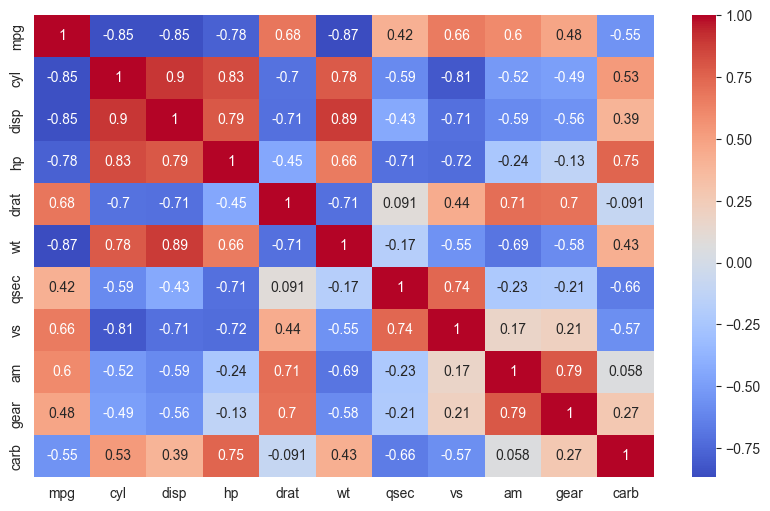

In [128]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Countplot for all categorical columns
En caso de que haya variable target, discriminar por target

In [129]:
#make sns_countplot for all categorical columns
def sns_countplot(df, target):
    for col in df.select_dtypes(include=[object]).columns:
        plt.figure(figsize=(5,3))
        if target == None:
            sns.countplot(data=df, x=col, order = df[col].value_counts().index)
        else:#smaller
            sns.countplot(data=df, x=col, hue=target, order = df[col].value_counts().index)
            plt.show()

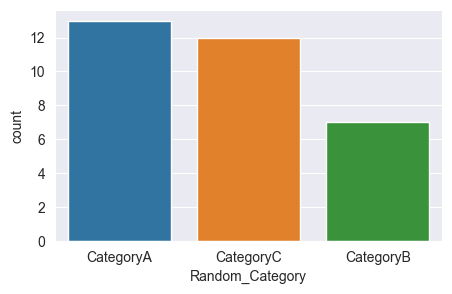

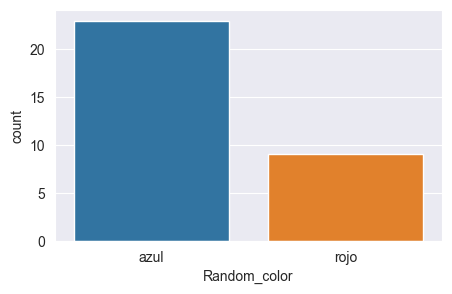

In [130]:
sns_countplot(df, None)

# Encoding

Chequear si no hay categoricas ordinales

In [131]:
X = df.drop(columns = 'Random_color')
y = df['Random_color']



df_categorical = X.select_dtypes(include=[object])

onehotencoder = OneHotEncoder()
df_encoded = onehotencoder.fit_transform(df_categorical).toarray()
feature_names = onehotencoder.get_feature_names_out(df_categorical.columns)

df_encoded = pd.DataFrame(df_encoded, columns = feature_names)
df_encoded.index = df.index

In [132]:
#concatenate the encoded columns to the original dataframe
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns = df_categorical.columns)

# Balanceo

In [143]:
prop = df["Random_color"].value_counts(normalize=True)

In [144]:
from scipy.stats import multivariate_normal, norm

expected_frequency = 1/len(np.unique(df["Random_color"]))

#Calculamos la desviación estandar de cada categoría
std_errors = np.sqrt(prop*(1-prop)/len(df["Random_color"]))

#Caculamos el p-value para cada categoría:
for target_val in prop.index:
  z = (prop[target_val] - expected_frequency)/std_errors[target_val]
  print("Class:",target_val)
  print("p-value:",norm.cdf(-np.abs(z)))
  print("----")

Class: azul
p-value: 0.002959367277636945
----
Class: rojo
p-value: 0.002959367277636945
----


p-valor muy pequeño. EL dataset está desbalanceado
si esta desbalanceado, hay que aplicar y_stratify.

In [149]:
#Replace 'azul' with 1 and 'rojo' with 0
df['Random_color'] = df['Random_color'].replace({'azul': 1, 'rojo': 0})

X = df.drop(columns = 'Random_color')
y = df['Random_color']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=99)

In [150]:
def model_trial(model, parameters, smote = False, ros = False):

  np.random.seed(42)

  #Queremos asegurarnos de tener los mismos 5 splits de data cada vez.
  #Para lograr eso creamos un KFold object, kf, y lo pasamos como cv=kf en vez del normal cv=5.
  kf = StratifiedKFold(n_splits=5, shuffle=False)

  #Definimos un pipeline según corresponda
  if smote:
    pipe = Pipeline(steps=[('smote', SMOTE(random_state=42)), ('standardscaler', StandardScaler()), ('selector', SelectKBest(f_classif)), ('classifier', model)])

  elif ros:
    pipe = Pipeline(steps=[('ros', RandomOverSampler(random_state=42)), ('standardscaler', StandardScaler()), ('selector', SelectKBest(f_classif)), ('classifier', model)])

  else:
    pipe = Pipeline([('scaler', StandardScaler()), ('selector', SelectKBest(f_classif)), ('classifier', model)])


  # Realizamos la validación cruzada Gridsearch para encontrar el mejor valor de C
  grid = GridSearchCV(pipe, parameters, cv=kf, scoring='precision') #Buscamos maximizar el precision
  grid.fit(X_train, y_train)

  # Obtenemos los mejores parametros y el modelo con ese valor
  best_params = grid.best_params_
  best_model = grid.best_estimator_
  best_score = grid.best_score_

  # Evaluamos el modelo en train y calculamos el AUC-ROC, F1-score y Precision-Score

  y_train_pred = best_model.predict(X_train)
  auc_roc_train = roc_auc_score(y_train, y_train_pred)
  f1_train = f1_score(y_train, y_train_pred)
  precision_train = precision_score(y_train, y_train_pred)

  # Evaluamos el modelo en test y calculamos el AUC-ROC, F1-score y Precision-Score
  y_pred = best_model.predict(X_test)
  auc_roc = roc_auc_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  print(f"Mejores parámetros: {best_params}")
  print(f"AUC-ROC Train: {auc_roc_train} and AUC-ROC Test: {auc_roc}")
  print(f"F1-Score Train: {f1_train} and F1-Score Test: {f1}")
  print(f"Precision-Score Train: {precision_train} and Precision-Score Test: {precision}")

  return precision, auc_roc, f1, best_model, precision_train, auc_roc_train, f1_train

In [151]:
#Modelo 1: Logistic Regression
model = LR()
parameters = {'selector__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
precision, auc_roc, f1, best_model, precision_train, auc_roc_train, f1_train = model_trial(model, parameters)

Mejores parámetros: {'classifier__C': 100, 'selector__k': 10}
AUC-ROC Train: 1.0 and AUC-ROC Test: 0.44999999999999996
F1-Score Train: 1.0 and F1-Score Test: 0.5
Precision-Score Train: 1.0 and Precision-Score Test: 0.6666666666666666


In [152]:
#Modelo 2: Random Forest
model = RandomForestClassifier()
parameters = {'selector__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'classifier__n_estimators': [10, 50, 100, 200, 500]}
precision, auc_roc, f1, best_model, precision_train, auc_roc_train, f1_train = model_trial(model, parameters)

Mejores parámetros: {'classifier__n_estimators': 10, 'selector__k': 5}
AUC-ROC Train: 0.9285714285714286 and AUC-ROC Test: 0.3
F1-Score Train: 0.972972972972973 and F1-Score Test: 0.6
Precision-Score Train: 0.9473684210526315 and Precision-Score Test: 0.6
